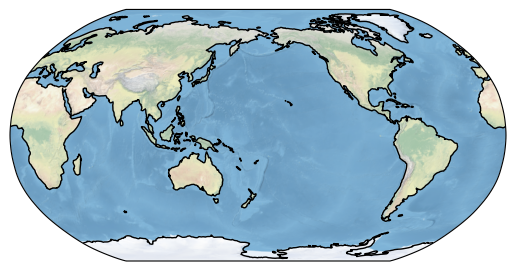

In [8]:
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Robinson(central_longitude=-180))
ax.stock_img()
ax.coastlines()

Text(106.4074, 29.904200000000003, 'PEK')

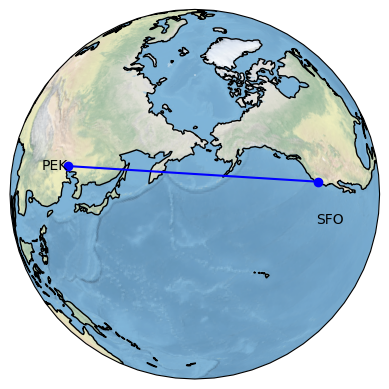

In [19]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

#ax = plt.axes(projection=ccrs.Robinson(central_longitude=-180))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-180, central_latitude=50))
ax.stock_img()
ax.coastlines()

SFO_lon, SFO_lat = -122.3790, 37.6213
PEK_lon, PEK_lat = 116.4074, 39.9042

plt.plot([SFO_lon, PEK_lon], [SFO_lat, PEK_lat], color = 'blue', marker = 'o', transform=ccrs.Geodetic())
plt.text(SFO_lon-10, SFO_lat - 10, 'SFO', transform=ccrs.Geodetic())
plt.text(PEK_lon-10, PEK_lat - 10, 'PEK', transform=ccrs.Geodetic())

In [20]:
import xarray as xr

ds = xr.open_dataset("../Lec11/amaps.nc")
ds

<xarray.Dataset>
Dimensions:      (lon: 180, lat: 90)
Coordinates:
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
Data variables:
    TEMPANOMALY  (lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.1
    title:        GISTEMP Surface Temperature Analysis: January 2023 L-OTI(de...
    institution:  NASA Goddard Institute for Space Sciences
    source:       https://data.giss.nasa.gov/gistemp/
    history:      Created 2023-02-28 10:58 EST by amaps_netcdf.cgi 1.2 using ...

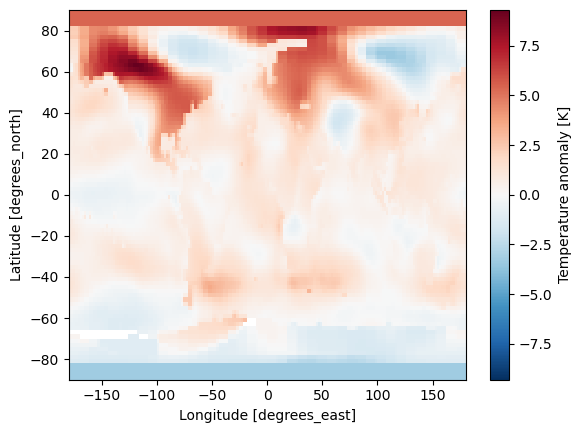

In [22]:
ta = ds["TEMPANOMALY"]
ta
ta.plot()

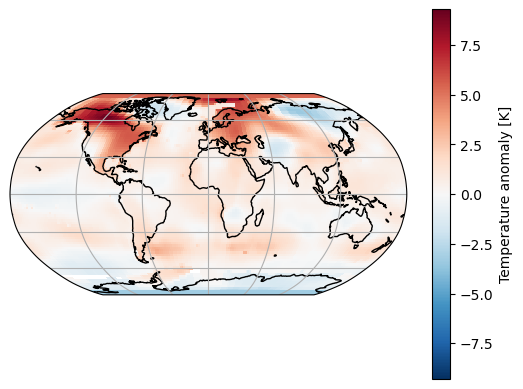

In [25]:
import cartopy.crs as ccrs

kws = dict(projection = ccrs.Robinson())

p = ta.plot(subplot_kws = kws, transform = ccrs.PlateCarree(), add_labels=True)
p.axes.gridlines()
p.axes.coastlines()

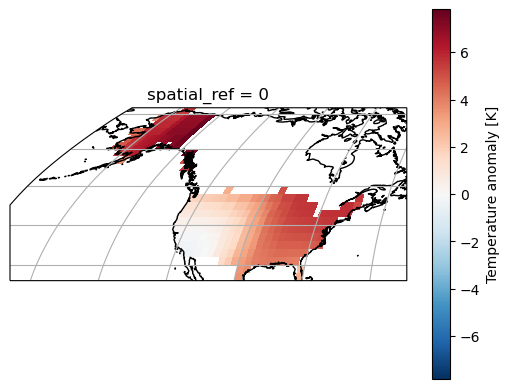

In [31]:
import geopandas as gpd
import rioxarray

world = gpd.read_file("../Lec11/World_Countries_shp/World_Countries__Generalized_.shp")
US = world.loc[world["COUNTRY"].isin(["United States"])]

ta = ta.rio.write_crs("epsg:4326")
US_ta = ta.rio.clip(US.geometry)

kws = dict(projection = ccrs.Robinson())

p = US_ta.plot(subplot_kws = kws, transform = ccrs.PlateCarree(), add_labels=True)
p.axes.gridlines()
p.axes.coastlines()

In [36]:
import xarray as xr
ds = xr.open_mfdataset("../Lec11/FLUXCOM/*.nc", concat_dim="time", combine="nested")
ds

<xarray.Dataset>
Dimensions:    (lon: 720, lat: 360, time: 180, nbnds: 2)
Coordinates:
  * lon        (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat        (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * time       (time) datetime64[ns] 2000-01-16 2000-02-16 ... 2014-12-16
Dimensions without coordinates: nbnds
Data variables:
    LE         (time, lat, lon) float32 dask.array<chunksize=(12, 360, 720), meta=np.ndarray>
    lat_bnds   (time, lat, nbnds) float64 dask.array<chunksize=(12, 360, 2), meta=np.ndarray>
    lon_bnds   (time, lon, nbnds) float64 dask.array<chunksize=(12, 720, 2), meta=np.ndarray>
    time_bnds  (time, nbnds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
Attributes: (12/14)
    Title:                          Multivariate Adaptive Regression Splines ...
    Version:                        v1
    Meteorolgical_Data_METEO:       GSWP3
    Machine_Learning_Method_MLM:    MARS
    Energy_Balance_Correction_EBC:  EBC-BWR
    Temporal_Resolution_tRESO:      monthly
    ...                             ...
    Provided_By:                    Martin Jung [mjung@bgc-jena.mpg.de] on be...
    Created_By:                     Fabian Gans [fgans@bgc-jena.mpg.de], Ulri...
    SETUP:                          RS_METEO
    TYPE:                           member
    Spatial_Resolution_sRESO:       720_360
    History:                        created: Mon Mar 18 15:14:06 2019

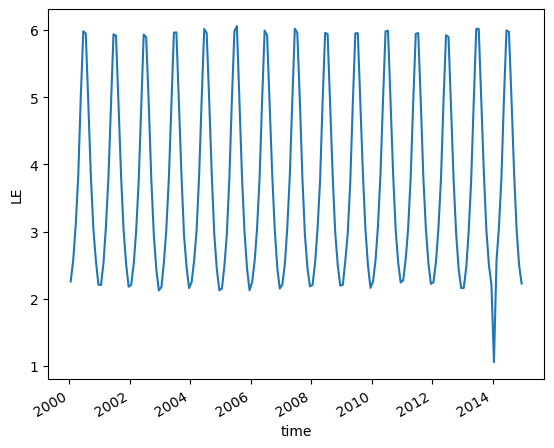

In [39]:
LE = ds['LE']
LEmean = LE.mean(dim=['lon','lat'])
LEmean.plot()

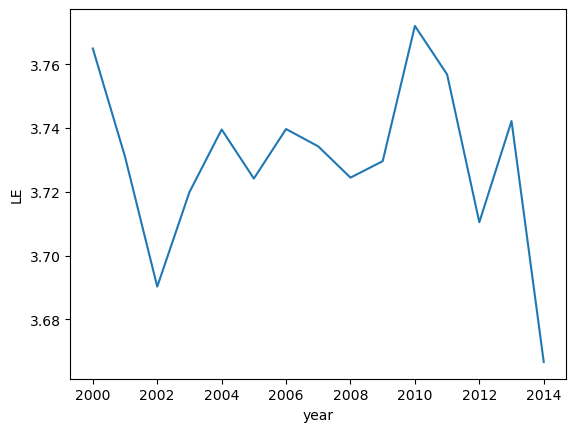

In [42]:
LE = ds['LE']
LEyear = LE.groupby('time.year').mean('time')
LEyearmean = LEyear.mean(dim=['lon','lat'])
LEyearmean.plot()

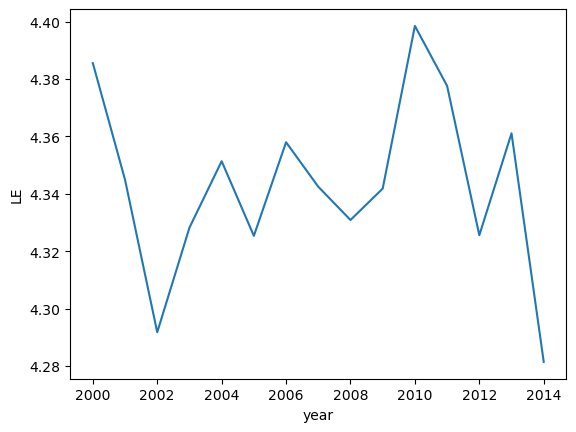

In [46]:
import numpy as np
LE = ds['LE']
LEyear = LE.groupby('time.year').mean('time')

weights = np.cos(np.deg2rad(LE.lat))
weights

LEyear_weighted = LEyear.weighted(weights)
LEyear_weighted
LEyear_weightedmean = LEyear_weighted.mean(dim=['lon','lat'])

LEyear_weightedmean.plot()